In [14]:
#!/usr/bin/env python
# Created by "Thieu" at 10:49, 01/07/2022 ----------%                                                                               
#       Email: nguyenthieu2102@gmail.com            %                                                    
#       Github: https://github.com/thieu1995        %                         
# --------------------------------------------------%

import numpy as np


def rounder(x, condition):
    temp_2x = 2 * x
    dec, inter = np.modf(temp_2x)
    temp_2x = np.where(temp_2x <= 0.0, inter - (dec >= 0.5), temp_2x)
    temp_2x = np.where(dec < 0.5, inter, temp_2x)
    temp_2x = np.where(dec >= 0.5, inter + 1, temp_2x)
    return np.where(condition < 0.5, x, temp_2x / 2)


def griewank_func(x):
    x = np.array(x).ravel()
    idx = np.arange(1, len(x) + 1)
    t1 = np.sum(x ** 2) / 4000
    t2 = np.prod(np.cos(x / np.sqrt(idx)))
    return t1 - t2 + 1


def rosenbrock_func(x, shift=0.0):
    x = np.array(x).ravel() + shift
    term1 = 100 * (x[:-1] ** 2 - x[1:]) ** 2
    term2 = (x[:-1] - 1) ** 2
    return np.sum(term1 + term2)

def scaffer_func(x):
    x = np.array(x).ravel()
    return 0.5 + (np.sin(np.sqrt(np.sum(x ** 2))) ** 2 - 0.5) / (1 + 0.001 * np.sum(x ** 2)) ** 2


def rastrigin_func(x):
    x = np.array(x).ravel()
    return np.sum(x ** 2 - 10 * np.cos(2 * np.pi * x) + 10)


def weierstrass_func(x, a=0.5, b=3., k_max=20):
    x = np.array(x).ravel()
    ndim = len(x)
    k = np.arange(0, k_max + 1)
    result = 0
    for idx in range(0, ndim):
        result += np.sum(a ** k * np.cos(2 * np.pi * b ** k * (x[idx] + 0.5)))
    return result - ndim * np.sum(a ** k * np.cos(np.pi * b ** k))


def weierstrass_norm_func(x, a=0.5, b=3., k_max=20):
    """
    This function matches CEC2005 description of F11 except for addition of the bias and follows the C implementation
    """
    return weierstrass_func(x, a, b, k_max) - weierstrass_func(np.zeros(len(x)), a, b, k_max)


def ackley_func(x):
    x = np.array(x).ravel()
    ndim = len(x)
    t1 = np.sum(x ** 2)
    t2 = np.sum(np.cos(2 * np.pi * x))
    return -20 * np.exp(-0.2 * np.sqrt(t1 / ndim)) - np.exp(t2 / ndim) + 20 + np.e


def sphere_func(x):
    x = np.array(x).ravel()
    return np.sum(x ** 2)


def rotated_expanded_schaffer_func(x):
    x = np.asarray(x).ravel()
    x_pairs = np.column_stack((x, np.roll(x, -1)))
    sum_sq = x_pairs[:, 0] ** 2 + x_pairs[:, 1] ** 2
    # Calculate the Schaffer function for all pairs simultaneously
    schaffer_values = (0.5 + (np.sin(np.sqrt(sum_sq)) ** 2 - 0.5) /
                       (1 + 0.001 * sum_sq) ** 2)
    return np.sum(schaffer_values)


def rotated_expanded_scaffer_func(x):
    x = np.array(x).ravel()
    results = [scaffer_func([x[idx], x[idx + 1]]) for idx in range(0, len(x) - 1)]
    return np.sum(results) + scaffer_func([x[-1], x[0]])


def grie_rosen_cec_func(x):
    """This is based on the CEC version which unrolls the griewank and rosenbrock functions for better performance"""
    z = np.array(x).ravel()
    z += 1.0  # This centers the optimal solution of rosenbrock to 0

    tmp1 = (z[:-1] * z[:-1] - z[1:]) ** 2
    tmp2 = (z[:-1] - 1.0) ** 2
    temp = 100.0 * tmp1 + tmp2
    f = np.sum(temp ** 2 / 4000.0 - np.cos(temp) + 1.0)
    # Last calculation
    tmp1 = (z[-1] * z[-1] - z[0]) ** 2
    tmp2 = (z[-1] - 1.0) ** 2
    temp = 100.0 * tmp1 + tmp2
    f += (temp ** 2) / 4000.0 - np.cos(temp) + 1.0

    return f


def f8f2_func(x):
    x = np.array(x).ravel()
    results = [griewank_func(rosenbrock_func([x[idx], x[idx + 1]])) for idx in range(0, len(x) - 1)]
    return np.sum(results) + griewank_func(rosenbrock_func([x[-1], x[0]]))


def non_continuous_expanded_scaffer_func(x):
    x = np.array(x).ravel()
    y = rounder(x, np.abs(x))
    results = [scaffer_func([y[idx], y[idx + 1]]) for idx in range(0, len(x) - 1)]
    return np.sum(results) + scaffer_func([y[-1], y[0]])


def non_continuous_rastrigin_func(x):
    x = np.array(x).ravel()
    y = rounder(x, np.abs(x))
    shifted_y = np.roll(y, -1)
    results = rastrigin_func(np.column_stack((y, shifted_y)))
    return np.sum(results)


def elliptic_func(x):
    x = np.array(x).ravel()
    ndim = len(x)
    idx = np.arange(0, ndim)
    return np.sum(10 ** (6.0 * idx / (ndim - 1)) * x ** 2)



def sphere_noise_func(x):
    x = np.array(x).ravel()
    return np.sum(x ** 2) * (1 + 0.1 * np.abs(np.random.normal(0, 1)))


def twist_func(x):
    # This function in CEC-2008 F7
    return 4 * (x ** 4 - 2 * x ** 3 + x ** 2)


def doubledip(x, c, s):
    # This function in CEC-2008 F7
    if -0.5 < x < 0.5:
        return (-6144 * (x - c) ** 6 + 3088 * (x - c) ** 4 - 392 * (x - c) ** 2 + 1) * s
    else:
        return 0


def fractal_1d_func(x):
    # This function in CEC-2008 F7
    np.random.seed(0)
    result1 = 0.0
    for k in range(1, 4):
        result2 = 0.0
        upper = 2 ** (k - 1) + 1
        for t in range(1, upper):
            selected = np.random.choice([0, 1, 2], p=1 / 3 * np.ones(3))
            result2 += np.sum([doubledip(x, np.random.uniform(0, 1), 1.0 / (2 ** (k - 1) * (2 - np.random.uniform(0, 1)))) for _ in range(0, selected)])
        result1 += result2
    return result1


def schwefel_12_func(x):
    x = np.array(x).ravel()
    ndim = len(x)
    return np.sum([np.sum(x[:idx]) ** 2 for idx in range(0, ndim)])


def tosz_func(x):
    def transform(xi):
        if xi > 0:
            c1, c2, x_sign = 10., 7.9, 1.0
            x_star = np.log(np.abs(xi))
        elif xi == 0:
            c1, c2, x_sign, x_star = 5.5, 3.1, 0., 0.
        else:
            c1, c2, x_sign = 5.5, 3.1, -1.
            x_star = np.log(np.abs(xi))
        return x_sign * np.exp(x_star + 0.049 * (np.sin(c1 * x_star) + np.sin(c2 * x_star)))

    x = np.array(x).ravel()
    x[0] = transform(x[0])
    x[-1] = transform(x[-1])
    return x


def tasy_func(x, beta=0.5):
    x = np.array(x).ravel()
    ndim = len(x)
    idx = np.arange(0, ndim)
    up = 1 + beta * ((idx - 1) / (ndim - 1)) * np.sqrt(np.abs(x))
    x_temp = np.abs(x) ** up
    return np.where(x > 0, x_temp, x)


def bent_cigar_func(x):
    x = np.array(x).ravel()
    return x[0] ** 2 + 10 ** 6 * np.sum(x[1:] ** 2)


def discus_func(x):
    x = np.array(x).ravel()
    return 1e6 * x[0] ** 2 + np.sum(x[1:] ** 2)


def different_powers_func(x):
    x = np.array(x).ravel()
    ndim = len(x)
    idx = np.arange(0, ndim)
    up = 2 + 4 * idx / (ndim - 1)
    return np.sqrt(np.sum(np.abs(x) ** up))


def generate_diagonal_matrix(size, alpha=10):
    idx = np.arange(0, size)
    diagonal = alpha ** (idx / (2 * (size - 1)))
    matrix = np.zeros((size, size), float)
    np.fill_diagonal(matrix, diagonal)
    return matrix


def gz_func(x):
    x = np.array(x).ravel()
    ndim = len(x)
    t1 = (500 - np.mod(x, 500)) * np.sin(np.sqrt(np.abs(500 - np.mod(x, 500)))) - (x - 500) ** 2 / (10000 * ndim)
    t2 = (np.mod(np.abs(x), 500) - 500) * np.sin(np.sqrt(np.abs(np.mod(np.abs(x), 500) - 500))) - (x + 500) ** 2 / (10000 * ndim)
    t3 = x * np.sin(np.abs(x) ** 0.5)
    conditions = [x < -500, (-500 <= x) & (x <= 500), x > 500]
    choices = [t2, t3, t1]
    y = np.select(conditions, choices, default=np.nan)
    return y


def katsuura_func(x):
    x = np.array(x).ravel()
    ndim = len(x)
    result = 1.0
    for idx in range(0, ndim):
        temp = np.sum([np.abs(2 ** j * x[idx] - np.round(2 ** j * x[idx])) / 2 ** j for j in range(1, 33)])
        result *= (1 + (idx + 1) * temp) ** (10.0 / ndim ** 1.2)
    return (result - 1) * 10 / ndim ** 2


def lunacek_bi_rastrigin_func(x, miu0=2.5, d=1, shift=0.0):
    x = np.array(x).ravel() + shift
    ndim = len(x)
    s = 1.0 - 1.0 / (2 * np.sqrt(ndim + 20) - 8.2)
    miu1 = -np.sqrt((miu0 ** 2 - d) / s)
    delta_x_miu0 = x - miu0
    term1 = np.sum(delta_x_miu0 ** 2)
    term2 = np.sum((x - miu1) ** 2) * s + d * ndim
    result = min(term1, term2) + 10 * (ndim - np.sum(np.cos(2 * np.pi * delta_x_miu0)))
    return result


def calculate_weight(x, delta=1.):
    ndim = len(x)
    temp = np.sum(x ** 2)
    if temp != 0:
        weight = np.sqrt(1.0 / temp) * np.exp(-temp / (2 * ndim * delta ** 2))
    else:
        weight = 1e99  # this is the INF definition in original CEC Calculate logic

    return weight


def modified_schwefel_func(x):
    """
        This is a direct conversion of the CEC2021 C-Code for the Modified Schwefel F11 Function
    """
    z = np.array(x).ravel() + 4.209687462275036e+002
    nx = len(z)

    mask1 = z > 500
    mask2 = z < -500
    mask3 = ~mask1 & ~mask2
    fx = np.zeros(nx)
    fx[mask1] -= (500.0 + np.fmod(np.abs(z[mask1]), 500)) * np.sin(np.sqrt(500.0 - np.fmod(np.abs(z[mask1]), 500))) - (
                (z[mask1] - 500.0) / 100.) ** 2 / nx
    fx[mask2] -= (-500.0 + np.fmod(np.abs(z[mask2]), 500)) * np.sin(np.sqrt(500.0 - np.fmod(np.abs(z[mask2]), 500))) - (
                (z[mask2] + 500.0) / 100.) ** 2 / nx
    fx[mask3] -= z[mask3] * np.sin(np.sqrt(np.abs(z[mask3])))

    return np.sum(fx) + 4.189828872724338e+002 * nx


def happy_cat_func(x, shift=0.0):
    z = np.array(x).ravel() + shift
    ndim = len(z)
    t1 = np.sum(z)
    t2 = np.sum(z ** 2)
    return np.abs(t2 - ndim) ** 0.25 + (0.5 * t2 + t1) / ndim + 0.5


def hgbat_func(x, shift=0.0):
    x = np.array(x).ravel() + shift
    ndim = len(x)
    t1 = np.sum(x)
    t2 = np.sum(x ** 2)
    return np.abs(t2 ** 2 - t1 ** 2) ** 0.5 + (0.5 * t2 + t1) / ndim + 0.5


def zakharov_func(x):
    x = np.array(x).ravel()
    temp = np.sum(0.5 * x)
    return np.sum(x ** 2) + temp ** 2 + temp ** 4


def levy_func(x, shift=0.0):
    x = np.array(x).ravel() + shift
    w = 1. + (x - 1.) / 4
    t1 = np.sin(np.pi * w[0]) ** 2 + (w[-1] - 1) ** 2 * (1 + np.sin(2 * np.pi * w[-1]) ** 2)
    t2 = np.sum((w[:-1] - 1) ** 2 * (1 + 10 * np.sin(np.pi * w[:-1] + 1) ** 2))
    return t1 + t2


def expanded_schaffer_f6_func(x):
    """
    This is a direct conversion of the CEC2021 C-Code for the Expanded Schaffer F6 Function
    """
    z = np.array(x).ravel()

    temp1 = np.sin(np.sqrt(z[:-1] ** 2 + z[1:] ** 2))
    temp1 = temp1 ** 2
    temp2 = 1.0 + 0.001 * (z[:-1] ** 2 + z[1:] ** 2)
    f = np.sum(0.5 + (temp1 - 0.5) / (temp2 ** 2))

    temp1_last = np.sin(np.sqrt(z[-1] ** 2 + z[0] ** 2))
    temp1_last = temp1_last ** 2
    temp2_last = 1.0 + 0.001 * (z[-1] ** 2 + z[0] ** 2)
    f += 0.5 + (temp1_last - 0.5) / (temp2_last ** 2)

    return f


def schaffer_f7_func(x):
    x = np.array(x).ravel()
    ndim = len(x)
    result = 0.0
    for idx in range(0, ndim - 1):
        t = x[idx] ** 2 + x[idx + 1] ** 2
        result += np.sqrt(t) * (np.sin(50. * t ** 0.2) + 1)
    return (result / (ndim - 1)) ** 2


def chebyshev_func(x):
    """
    The following was converted from the cec2019 C code
    Storn's Tchebychev - a 2nd ICEO function - generalized version
    """
    x = np.array(x).ravel()
    ndim = len(x)
    sample = 32 * ndim

    dx_arr = np.zeros(ndim)
    dx_arr[:2] = [1.0, 1.2]
    for i in range(2, ndim):
        dx_arr[i] = 2.4 * dx_arr[i-1] - dx_arr[i-2]
    dx = dx_arr[-1]

    dy = 2.0 / sample

    px, y, sum_val = 0, -1, 0
    for i in range(sample + 1):
        px = x[0]
        for j in range(1, ndim):
            px = y * px + x[j]
        if px < -1 or px > 1:
            sum_val += (1.0 - abs(px)) ** 2
        y += dy

    for _ in range(2):
        px = np.sum(1.2 * x[1:]) + x[0]
        mask = px < dx
        sum_val += np.sum(px[mask] ** 2)

    return sum_val


def inverse_hilbert_func(x):
    """
    This is a direct conversion of the cec2019 C code for python optimized to use numpy
    """
    x = np.array(x).ravel()
    ndim = len(x)
    b = int(np.sqrt(ndim))

    # Create the Hilbert matrix
    i, j = np.indices((b, b))
    hilbert = 1.0 / (i + j + 1)

    # Reshape x and compute H*x
    x = x.reshape((b, b))
    y = np.dot(hilbert, x).dot(hilbert.T)

    # Compute the absolute deviations
    result = np.sum(np.abs(y - np.eye(b)))
    return result


def lennard_jones_func(x):
    """
    This version is a direct python conversion from the C-Code of CEC2019 implementation.
    Find the atomic configuration with minimum energy (Lennard-Jones potential)
    Valid for any dimension, D = 3 * k, k = 2, 3, 4, ..., 25.
    k is the number of atoms in 3-D space.
    """
    x = np.array(x).ravel()
    ndim = len(x)
    # Minima values from Cambridge cluster database: http://www-wales.ch.cam.ac.uk/~jon/structures/LJ/tables.150.html
    minima = np.array([-1., -3., -6., -9.103852, -12.712062, -16.505384, -19.821489, -24.113360,
                       -28.422532, -32.765970, -37.967600, -44.326801, -47.845157, -52.322627, -56.815742,
                       -61.317995, -66.530949, -72.659782, -77.1777043, -81.684571, -86.809782, -02.844472,
                       -97.348815, -102.372663])

    k = ndim // 3
    sum_val = 0

    x_matrix = x.reshape((k, 3))
    for i in range(k-1):
        for j in range(i + 1, k):
            # Use slicing to get the differences between points i and j
            diff = x_matrix[i] - x_matrix[j]
            # Calculate the squared Euclidean distance
            ed = np.sum(diff ** 2)
            # Calculate ud and update sum_val accordingly
            ud = ed ** 3
            if ud > 1.0e-10:
                sum_val += (1.0 / ud - 2.0) / ud
            else:
                sum_val += 1.0e20  # cec2019 version penalizes when ud is <=1e-10
    return sum_val - minima[k - 2]  # Subtract known minima for k


expanded_griewank_rosenbrock_func = grie_rosen_cec_func
expanded_scaffer_f6_func = rotated_expanded_scaffer_func

In [16]:
#!/usr/bin/env python
# Created by "Thieu" at 16:47, 28/06/2022 ----------%                                                                               
#       Email: nguyenthieu2102@gmail.com            %                                                    
#       Github: https://github.com/thieu1995        %                         
# --------------------------------------------------%

import numpy as np


class Benchmark:
    """
    Defines an abstract class for optimization benchmark problem.

    All subclasses should implement the ``evaluate`` method for a particular optimization problem.

    Attributes
    ----------
    bounds : list
        The lower/upper bounds of the problem. This a 2D-matrix of [lower, upper] array that contain the lower and upper bounds.
        By default, each problem has its own bounds. But user can try to put different bounds to test the problem.
    ndim : int
        The dimensionality of the problem. It is calculated from bounds
    lb : np.ndarray
        The lower bounds for the problem
    ub : np.ndarray
        The upper bounds for the problem
    f_global : float
        The global optimum of the evaluated function.
    x_global : np.ndarray
        A list of vectors that provide the locations of the global minimum.
        Note that some problems have multiple global minima, not all of which may be listed.
    n_fe : int
        The number of function evaluations that the object has been asked to calculate.
    dim_changeable : bool
        Whether we can change the benchmark function `x` variable length (i.e., the dimensionality of the problem)
    """

    name = "Benchmark name"
    latex_formula = r'f(\mathbf{x})'
    latex_formula_dimension = r'd \in \mathbb{N}_{+}^{*}'
    latex_formula_bounds = r'x_i \in [-2\pi, 2\pi], \forall i \in \llbracket 1, d\rrbracket'
    latex_formula_global_optimum = r'f(0, ..., 0)=-1, \text{ for}, m=5, \beta=15'
    continuous = True
    linear = False
    convex = True
    unimodal = False
    separable = False

    differentiable = True
    scalable = True
    randomized_term = False
    parametric = True

    modality = True  # Number of ambiguous peaks, unknown # peaks
    # n_basins = 1
    # n_valleys = 1

    def __init__(self):
        self._bounds = None
        self._ndim = None
        self.dim_changeable = False
        self.dim_default = 2
        self.f_global = None
        self.x_global = None
        self.n_fe = 0
        self.paras = {}
        self.epsilon = 1e-8

    def check_ndim_and_bounds(self, ndim=None, bounds=None, default_bounds=None):
        """
        Check the bounds when initializing the object.

        Parameters
        ----------
        ndim : int
            The number of dimensions (variables)
        bounds : list, tuple, np.ndarray
            List of lower bound and upper bound, should use default None value
        default_bounds : np.ndarray
            List of initial lower bound and upper bound values
        """
        if ndim is None:
            self._bounds = default_bounds if bounds is None else np.array(bounds).T
            self._ndim = self._bounds.shape[1]
        else:
            if bounds is None:
                if self.dim_changeable:
                    if type(ndim) is int and ndim > 1:
                        self._ndim = int(ndim)
                        self._bounds = np.array([default_bounds[0] for _ in range(self._ndim)])
                    else:
                        raise ValueError('ndim must be an integer and > 1!')
                else:
                    self._ndim = self.dim_default
                    self._bounds = default_bounds
                    print(f"{self.__class__.__name__} is fixed problem with {self.dim_default} variables!")
            else:
                if self.dim_changeable:
                    self._bounds = np.array(bounds).T
                    self._ndim = self._bounds.shape[0]
                    print(f"{self.__class__.__name__} problem is set with {self._ndim} variables!")
                else:
                    self._bounds = np.array(bounds).T
                    if self._bounds.shape[0] != self.dim_default:
                        raise ValueError(f"{self.__class__.__name__} is fixed problem with {self._ndim} variables. Please setup the correct bounds!")
                    else:
                        self._ndim = self.dim_default

    def check_solution(self, x):
        """
        Raise the error if the problem size is not equal to the solution length

        Parameters
        ----------
        x : np.ndarray
            The solution
        """
        if not self.dim_changeable and (len(x) != self._ndim):
            raise ValueError(f"The length of solution should have {self._ndim} variables!")

    def get_paras(self):
        """
        Return the parameters of the problem. Depended on function
        """
        default = {"bounds": self._bounds, "ndim": self._ndim, }
        return {**default, **self.paras}

    def evaluate(self, x):
        """
        Evaluation of the benchmark function.

        Parameters
        ----------
        x : np.ndarray
            The candidate vector for evaluating the benchmark problem. Must have ``len(x) == self.ndim``.

        Returns
        -------
        val : float
              the evaluated benchmark function
        """

        raise NotImplementedError

    def is_ndim_compatible(self, ndim):
        """
        Method to support searching the functions with input ndim

        Parameters
        ----------
        ndim : int
                The number of dimensions

        Returns
        -------
        val: bool
             Always true if dim_changeable = True, Else return ndim == self.ndim
        """
        assert (ndim is None) or (isinstance(ndim, int) and (not ndim < 0)), "The dimension ndim must be None or a positive integer"
        if ndim is None:
            return True
        else:
            if self.dim_changeable:
                return ndim > 0
            else:
                return ndim == self.ndim

    def is_succeed(self, x, tol=1.e-5):
        """
        Check if a candidate solution at the global minimum.

        Parameters
        ----------
        x : np.ndarray
            The candidate vector for testing if the global minimum has been reached. Must have ``len(x) == self.ndim``
        tol : float
            The evaluated function and known global minimum must differ by less than this amount to be at a global minimum.

        Returns
        -------
        is_succeed : bool
            Answer the question: is the candidate vector at the global minimum?
        """

        # the solution should still be in bounds, otherwise immediate fail.
        if np.any(x > self.ub) or np.any(x < self.lb):
            return False

        val = self.evaluate(np.squeeze(x))
        if np.abs(val - self.f_global) < tol:
            return True

        # you found a lower global minimum.  This shouldn't happen.
        if val < self.f_global:
            raise ValueError("Found a lower global minimum", x, val, self.f_global)
        return False

    @property
    def bounds(self):
        """
        The lower/upper bounds to be used for optimization problem. This a 2D-matrix of [lower, upper] array that contain the lower and upper
        bounds for the problem. The problem should not be asked for evaluation outside these bounds. ``len(bounds) == ndim``.
        """
        return self._bounds

    @property
    def ndim(self):
        """
        The dimensionality of the problem.

        Returns
        -------
        ndim : int
            The dimensionality of the problem
        """
        return self._ndim

    @property
    def lb(self):
        """
        The lower bounds for the problem

        Returns
        -------
        lb : 1D-vector
            The lower bounds for the problem
        """
        return np.array([x[0] for x in self.bounds])

    @property
    def ub(self):
        """
        The upper bounds for the problem

        Returns
        -------
        ub : 1D-vector
            The upper bounds for the problem
        """
        return np.array([x[1] for x in self.bounds])

    def create_solution(self):
        """
        Create a random solution for the current problem

        Returns
        -------
        solution: 1D-vector
            The random solution
        """
        return np.random.uniform(self.lb, self.ub)

In [40]:
#!/usr/bin/env python
# Created by "Thieu" at 06:43, 30/06/2022 ----------%                                                                               
#       Email: nguyenthieu2102@gmail.com            %                                                    
#       Github: https://github.com/thieu1995        %                         
# --------------------------------------------------%

import numpy as np
import pkg_resources
from abc import ABC

class CecBenchmark(Benchmark, ABC):
    """
    Defines an abstract class for optimization benchmark problem.

    All subclasses should implement the ``evaluate`` method for a particular optimization problem.

    Attributes
    ----------
    bounds : list
        The lower/upper bounds of the problem. This a 2D-matrix of [lower, upper] array that contain the lower and upper bounds.
        By default, each problem has its own bounds. But user can try to put different bounds to test the problem.
    ndim : int
        The dimensionality of the problem. It is calculated from bounds
    lb : np.ndarray
        The lower bounds for the problem
    ub : np.ndarray
        The upper bounds for the problem
    f_global : float
        The global optimum of the evaluated function.
    x_global : np.ndarray
        A list of vectors that provide the locations of the global minimum.
        Note that some problems have multiple global minima, not all of which may be listed.
    n_fe : int
        The number of function evaluations that the object has been asked to calculate.
    dim_changeable : bool
        Whether we can change the benchmark function `x` variable length (i.e., the dimensionality of the problem)
    """

    name = "Benchmark name"
    latex_formula = r'f(\mathbf{x})'
    latex_formula_dimension = r'd \in \mathbb{N}_{+}^{*}'
    latex_formula_bounds = r'x_i \in [-2\pi, 2\pi], \forall i \in \llbracket 1, d\rrbracket'
    latex_formula_global_optimum = r'f(0, ..., 0)=-1, \text{ for}, m=5, \beta=15'
    continuous = True
    linear = False
    convex = True
    unimodal = False
    separable = False

    differentiable = True
    scalable = True
    randomized_term = False
    parametric = True
    shifted = True
    rotated = False

    modality = True  # Number of ambiguous peaks, unknown # peaks

    # n_basins = 1
    # n_valleys = 1

    def __init__(self):
        super().__init__()
        self._bounds = None
        self._ndim = None
        self.dim_changeable = True
        self.dim_default = 30
        self.dim_max = 100
        self.dim_supported = None
        self.f_global = None
        self.x_global = None
        self.n_fe = 0
        self.f_shift = None
        self.f_bias = None
        self.support_path = None
        self.verbose = False

    def make_support_data_path(self, data_name):
        self.support_path = f"{data_name}"

    def check_shift_data(self, f_shift):
        if type(f_shift) is str:
            return self.load_shift_data(f_shift)
        else:
            if type(f_shift) in [list, tuple, np.ndarray]:
                return np.squeeze(f_shift)
            else:
                raise ValueError(f"The shift data should be a list/tuple or np.array!")

    def check_shift_matrix(self, f_shift, selected_idx=None):
        if type(f_shift) is str:
            if selected_idx is None:
                return self.load_matrix_data(f_shift)
            else:
                return self.load_matrix_data(f_shift)[selected_idx, :self.ndim]
        else:
            if type(f_shift) in [list, tuple, np.ndarray]:
                return np.squeeze(f_shift)
            else:
                raise ValueError(f"The shift data should be a list/tuple or np.array!")

    def check_matrix_data(self, f_matrix, needed_dim=True):
        if type(f_matrix) is str:
            if needed_dim:
                return self.load_matrix_data(f"{f_matrix}{self.ndim}")
            else:
                return self.load_matrix_data(f_matrix)
        else:
            if type(f_matrix) is np.ndarray:
                return np.squeeze(f_matrix)
            else:
                raise ValueError(f"The matrix data should be an orthogonal matrix (2D np.array)!")

    def check_shuffle_data(self, f_shuffle, needed_dim=True):
        if type(f_shuffle) is str:
            if needed_dim:
                return self.load_shift_data(f"{f_shuffle}{self.ndim}")
            else:
                return self.load_shift_data(f_shuffle)
        else:
            if type(f_shuffle) in [list, tuple, np.ndarray]:
                return np.squeeze(f_shuffle)
            else:
                raise ValueError(f"The shuffle data should be a list/tuple or np.array!")

    def check_m_group(self, m_group=None):
        if type(m_group) is int:
            if int(self.ndim / m_group) > 1:
                return m_group
            else:
                raise ValueError(f"ndim is too small or m_group is too large!")
        else:
            raise ValueError(f"m_group is positive integer!")

    def load_shift_data(self, filename=None):
        data = np.genfromtxt(f"{self.support_path}/{filename}.txt", dtype=float)
        return data.reshape((-1))

    def load_matrix_data(self, filename=None):
        try:
            data = np.genfromtxt(f"{self.support_path}/{filename}.txt", dtype=float)
            return data
        except FileNotFoundError:
            print(f'The file named: {filename}.txt is not found.')
            print(f"{self.__class__.__name__} problem is only supported ndim in {self.dim_supported}!")
            exit(1)

    def load_shift_and_matrix_data(self, filename=None):
        data = np.genfromtxt(f"{self.support_path}/{filename}.txt", dtype=float)
        shift_data = data[:1, :].ravel()
        matrix_data = data[1:, :]
        return shift_data, matrix_data

    def load_two_matrix_and_shift_data(self, filename=None):
        data = np.genfromtxt(f"{self.support_path}/{filename}.txt", dtype=float)
        a_matrix = data[:100, :]
        b_matrix = data[100:200, :]
        shift_data = data[200:, :].ravel()
        return shift_data, a_matrix, b_matrix

    def check_solution(self, x, dim_max=None, dim_support=None):
        """
        Raise the error if the problem size is not equal to the solution length

        Parameters
        ----------
        x : np.ndarray
            The solution
        dim_max : The maximum number of variables that the function is supported
        dim_support : List of the supported dimensions
        """
        # if not self.dim_changeable and (len(x) != self._ndim):
        if len(x) != self._ndim:
            raise ValueError(f"{self.__class__.__name__} problem, the length of solution should have {self._ndim} variables!")
        if (dim_max is not None) and (len(x) > dim_max):
            raise ValueError(f"{self.__class__.__name__} problem is not supported ndim > {dim_max}!")
        if (dim_support is not None) and (len(x) not in dim_support):
            raise ValueError(f"{self.__class__.__name__} problem is only supported ndim in {dim_support}!")

    def check_ndim_and_bounds(self, ndim=None, dim_max=None, bounds=None, default_bounds=None):
        """
        Check the bounds when initializing the object.

        Parameters
        ----------
        ndim : int
            The number of dimensions (variables)
        dim_max : int
            The maximum number of dimensions (variables) that the problem is supported
        bounds : list, tuple, np.ndarray
            List of lower bound and upper bound, should use default None value
        default_bounds : np.ndarray
            List of initial lower bound and upper bound values
        """
        if ndim is None:
            self._bounds = default_bounds if bounds is None else np.array(bounds).T
            self._ndim = self._bounds.shape[0]
            if dim_max is not None and self._ndim > dim_max:
                raise ValueError(f"{self.__class__.__name__} problem supports maximum {dim_max} variables!")
        else:
            if bounds is None:
                if self.dim_changeable:
                    if type(ndim) is int and ndim > 1:
                        if dim_max is None or ndim <= dim_max:
                            self._ndim = int(ndim)
                            self._bounds = np.array([default_bounds[0] for _ in range(self._ndim)])
                        else:
                            raise ValueError(f"{self.__class__.__name__} problem supports maximum {dim_max} variables!")
                    else:
                        raise ValueError('ndim must be an integer and > 1!')
                else:
                    self._ndim = self.dim_default
                    self._bounds = default_bounds
                    if self.verbose:
                        print(f"{self.__class__.__name__} is fixed problem with {self.dim_default} variables!")
            else:
                if self.dim_changeable:
                    self._bounds = np.array(bounds).T
                    self._ndim = self._bounds.shape[0]
                    if self._ndim > dim_max:
                        raise ValueError(f"{self.__class__.__name__} problem supports maximum {dim_max} variables!")
                    else:
                        print(f"{self.__class__.__name__} problem is set with {self._ndim} variables!")
                else:
                    self._bounds = np.array(bounds).T
                    if self._bounds.shape[0] == self.dim_default:
                        self._ndim = self.dim_default
                    else:
                        raise ValueError(f"{self.__class__.__name__} is fixed problem with {self._ndim} variables. Please setup the correct bounds!")

In [41]:
#!/usr/bin/env python
# Created by "Thieu" at 21:17, 12/07/2022 ----------%                                                                               
#       Email: nguyenthieu2102@gmail.com            %                                                    
#       Github: https://github.com/thieu1995        %                         
# --------------------------------------------------%

import numpy as np


class F12020(CecBenchmark):
    """
    .. [1] Problem Definitions and Evaluation Criteria for the CEC 2020
    Special Session and Competition on Single Objective Bound Constrained Numerical Optimization
    """
    name = "F1: Shifted and Rotated Bent Cigar Function (F1 CEC-2017)"
    latex_formula = r'F_1(x) = \sum_{i=1}^D z_i^2 + bias, z=x-o,\\ x=[x_1, ..., x_D]; o=[o_1, ..., o_D]: \text{the shifted global optimum}'
    latex_formula_dimension = r'2 <= D <= 100'
    latex_formula_bounds = r'x_i \in [-100.0, 100.0], \forall i \in  [1, D]'
    latex_formula_global_optimum = r'\text{Global optimum: } x^* = o, F_1(x^*) = bias = 100.0'

    continuous = True
    linear = False
    convex = True
    unimodal = True
    separable = False

    differentiable = True
    scalable = True
    randomized_term = False
    parametric = True
    shifted = True
    rotated = True

    modality = False  # Number of ambiguous peaks, unknown # peaks
    # n_basins = 1
    # n_valleys = 1

    characteristics = ["Smooth but narrow ridge"]

    def __init__(self, ndim=None, bounds=None, f_shift="shift_data_1", f_matrix="M_1_D", f_bias=100.):
        super().__init__()
        self.dim_changeable = True
        self.dim_default = 30
        self.dim_max = 100
        self.dim_supported = [2, 5, 10, 15, 20, 30, 50, 100]
        self.check_ndim_and_bounds(ndim, self.dim_max, bounds, np.array([[-100., 100.] for _ in range(self.dim_default)]))
        self.make_support_data_path("data_2020")
        self.f_shift = self.check_shift_data(f_shift)[:self.ndim]
        self.f_matrix = self.check_matrix_data(f_matrix, needed_dim=True)
        self.f_bias = f_bias
        self.f_global = f_bias
        self.x_global = self.f_shift
        self.paras = {"f_shift": self.f_shift, "f_bias": self.f_bias, "f_matrix": self.f_matrix}

    def evaluate(self, x, *args):
        self.n_fe += 1
        self.check_solution(x, self.dim_max, self.dim_supported)
        z = np.dot(self.f_matrix, x - self.f_shift)
        return bent_cigar_func(z) + self.f_bias


class F22020(CecBenchmark):
    """
    .. [1] Problem Definitions and Evaluation Criteria for the CEC 2020
    Special Session and Competition on Single Objective Bound Constrained Numerical Optimization
    """
    name = "F2: Shifted and Rotated Schwefel’s Function (F11 CEC-2014)"
    latex_formula = r'F_1(x) = \sum_{i=1}^D z_i^2 + bias, z=x-o,\\ x=[x_1, ..., x_D]; o=[o_1, ..., o_D]: \text{the shifted global optimum}'
    latex_formula_dimension = r'2 <= D <= 100'
    latex_formula_bounds = r'x_i \in [-100.0, 100.0], \forall i \in  [1, D]'
    latex_formula_global_optimum = r'\text{Global optimum: } x^* = o, F_1(x^*) = bias = 1100.0'

    continuous = True
    linear = False
    convex = False
    unimodal = False
    separable = False

    differentiable = True
    scalable = True
    randomized_term = False
    parametric = True
    shifted = True
    rotated = True

    modality = True  # Number of ambiguous peaks, unknown # peaks
    # n_basins = 1
    # n_valleys = 1

    characteristics = ["Local optima’s number is huge", "The penultimate local optimum is far from the global optimum."]

    def __init__(self, ndim=None, bounds=None, f_shift="shift_data_2", f_matrix="M_2_D", f_bias=1100.):
        super().__init__()
        self.dim_changeable = True
        self.dim_default = 30
        self.dim_max = 100
        self.dim_supported = [2, 5, 10, 15, 20, 30, 50, 100]
        self.check_ndim_and_bounds(ndim, self.dim_max, bounds, np.array([[-100., 100.] for _ in range(self.dim_default)]))
        self.make_support_data_path("data_2020")
        self.f_shift = self.check_shift_data(f_shift)[:self.ndim]
        self.f_matrix = self.check_matrix_data(f_matrix, needed_dim=True)
        self.f_bias = f_bias
        self.f_global = f_bias
        self.x_global = self.f_shift
        self.paras = {"f_shift": self.f_shift, "f_bias": self.f_bias, "f_matrix": self.f_matrix}

    def evaluate(self, x, *args):
        self.n_fe += 1
        self.check_solution(x, self.dim_max, self.dim_supported)
        z = np.dot(self.f_matrix, 1000.*(x - self.f_shift)/100)
        return modified_schwefel_func(z) + self.f_bias


class F32020(CecBenchmark):
    """
    .. [1] Problem Definitions and Evaluation Criteria for the CEC 2020
    Special Session and Competition on Single Objective Bound Constrained Numerical Optimization
    """
    name = "F3: Shifted and Rotated Lunacek bi-Rastrigin Function (F7 CEC-2017)"
    latex_formula = r'F_1(x) = \sum_{i=1}^D z_i^2 + bias, z=x-o,\\ x=[x_1, ..., x_D]; o=[o_1, ..., o_D]: \text{the shifted global optimum}'
    latex_formula_dimension = r'2 <= D <= 100'
    latex_formula_bounds = r'x_i \in [-100.0, 100.0], \forall i \in  [1, D]'
    latex_formula_global_optimum = r'\text{Global optimum: } x^* = o, F_1(x^*) = bias = 700.0'

    continuous = True
    linear = False
    convex = False
    unimodal = False
    separable = False

    differentiable = False
    scalable = True
    randomized_term = False
    parametric = True
    shifted = True
    rotated = True

    modality = False  # Number of ambiguous peaks, unknown # peaks
    # n_basins = 1
    # n_valleys = 1

    characteristics = ["Asymmetrical", "Continuous everywhere yet differentiable nowhere"]

    def __init__(self, ndim=None, bounds=None, f_shift="shift_data_3", f_matrix="M_3_D", f_bias=700.):
        super().__init__()
        self.dim_changeable = True
        self.dim_default = 30
        self.dim_max = 100
        self.dim_supported = [2, 5, 10, 15, 20, 30, 50, 100]
        self.check_ndim_and_bounds(ndim, self.dim_max, bounds, np.array([[-100., 100.] for _ in range(self.dim_default)]))
        self.make_support_data_path("data_2020")
        self.f_shift = self.check_shift_data(f_shift)[:self.ndim]
        self.f_matrix = self.check_matrix_data(f_matrix, needed_dim=True)
        self.f_bias = f_bias
        self.f_global = f_bias
        self.x_global = self.f_shift
        self.paras = {"f_shift": self.f_shift, "f_bias": self.f_bias, "f_matrix": self.f_matrix}

    def evaluate(self, x, *args):
        self.n_fe += 1
        self.check_solution(x, self.dim_max, self.dim_supported)
        z = np.dot(self.f_matrix, 600.*(x - self.f_shift)/100)
        return lunacek_bi_rastrigin_func(z, shift=2.5) + self.f_bias


class F42020(CecBenchmark):
    """
    .. [1] Problem Definitions and Evaluation Criteria for the CEC 2020
    Special Session and Competition on Single Objective Bound Constrained Numerical Optimization
    """
    name = "F4: Expanded Rosenbrock’s plus Griewank’s Function (F15 CEC-2014)"
    latex_formula = r'F_1(x) = \sum_{i=1}^D z_i^2 + bias, z=x-o,\\ x=[x_1, ..., x_D]; o=[o_1, ..., o_D]: \text{the shifted global optimum}'
    latex_formula_dimension = r'2 <= D <= 100'
    latex_formula_bounds = r'x_i \in [-100.0, 100.0], \forall i \in  [1, D]'
    latex_formula_global_optimum = r'\text{Global optimum: } x^* = o, F_1(x^*) = bias = 1900.0'

    continuous = True
    linear = False
    convex = False
    unimodal = False
    separable = False

    differentiable = True
    scalable = True
    randomized_term = False
    parametric = True
    shifted = True
    rotated = True

    modality = False  # Number of ambiguous peaks, unknown # peaks
    # n_basins = 1
    # n_valleys = 1

    characteristics = ["Optimal point locates in flat area"]

    def __init__(self, ndim=None, bounds=None, f_shift="shift_data_4", f_matrix="M_4_D", f_bias=1900.):
        super().__init__()
        self.dim_changeable = True
        self.dim_default = 30
        self.dim_max = 100
        self.dim_supported = [2, 5, 10, 15, 20, 30, 50, 100]
        self.check_ndim_and_bounds(ndim, self.dim_max, bounds, np.array([[-100., 100.] for _ in range(self.dim_default)]))
        self.make_support_data_path("data_2020")
        self.f_shift = self.check_shift_data(f_shift)[:self.ndim]
        self.f_matrix = self.check_matrix_data(f_matrix, needed_dim=True)
        self.f_bias = f_bias
        self.f_global = f_bias
        self.x_global = self.f_shift
        self.paras = {"f_shift": self.f_shift, "f_bias": self.f_bias, "f_matrix": self.f_matrix}

    def evaluate(self, x, *args):
        self.n_fe += 1
        self.check_solution(x, self.dim_max, self.dim_supported)
        z = np.dot(self.f_matrix, 5. * (x - self.f_shift) / 100)
        return expanded_griewank_rosenbrock_func(z) + self.f_bias


class F52020(CecBenchmark):
    """
    .. [1] Problem Definitions and Evaluation Criteria for the CEC 2020
    Special Session and Competition on Single Objective Bound Constrained Numerical Optimization
    """
    name = "F17: Hybrid Function 1 (F17 CEC-2014)"
    latex_formula = r'F_1(x) = \sum_{i=1}^D z_i^2 + bias, z=x-o,\\ x=[x_1, ..., x_D]; o=[o_1, ..., o_D]: \text{the shifted global optimum}'
    latex_formula_dimension = r'2 <= D <= 100'
    latex_formula_bounds = r'x_i \in [-100.0, 100.0], \forall i \in  [1, D]'
    latex_formula_global_optimum = r'\text{Global optimum: } x^* = o, F_1(x^*) = bias = 1700.0'

    continuous = True
    linear = False
    convex = False
    unimodal = False
    separable = False

    differentiable = True
    scalable = True
    randomized_term = False
    parametric = True
    shifted = True
    rotated = True

    modality = True  # Number of ambiguous peaks, unknown # peaks
    # n_basins = 1
    # n_valleys = 1

    characteristics = ["Different properties for different variables subcomponents"]

    def __init__(self, ndim=None, bounds=None, f_shift="shift_data_6", f_matrix="M_6_D", f_shuffle="shuffle_data_6_D", f_bias=1700.):
        super().__init__()
        self.dim_changeable = True
        self.dim_default = 30
        self.dim_max = 100
        self.dim_supported = [10, 15, 20, 30, 50, 100]
        self.check_ndim_and_bounds(ndim, self.dim_max, bounds, np.array([[-100., 100.] for _ in range(self.dim_default)]))
        self.make_support_data_path("data_2020")
        self.f_shift = self.check_shift_data(f_shift)[:self.ndim]
        self.f_matrix = self.check_matrix_data(f_matrix, needed_dim=True)
        self.f_shuffle = self.check_shuffle_data(f_shuffle, needed_dim=True)
        self.f_shuffle = (self.f_shuffle - 1).astype(int)
        self.f_bias = f_bias
        self.f_global = f_bias
        self.x_global = self.f_shift
        self.n_funcs = 3
        self.p = np.array([0.3, 0.3, 0.4])
        self.n1 = int(np.ceil(self.p[0] * self.ndim))
        self.n2 = int(np.ceil(self.p[1] * self.ndim)) + self.n1
        self.idx1, self.idx2, self.idx3 = self.f_shuffle[:self.n1], self.f_shuffle[self.n1:self.n2], self.f_shuffle[self.n2:self.ndim]
        self.g1 = modified_schwefel_func
        self.g2 = rastrigin_func
        self.g3 = elliptic_func
        self.paras = {"f_shift": self.f_shift, "f_bias": self.f_bias, "f_matrix": self.f_matrix, "f_shuffle": self.f_shuffle}

    def evaluate(self, x, *args):
        self.n_fe += 1
        self.check_solution(x, self.dim_max, self.dim_supported)
        z = x - self.f_shift
        z1 = np.concatenate((z[self.idx1], z[self.idx2], z[self.idx3]))
        mz = np.dot(self.f_matrix, z1)
        return self.g1(mz[:self.n1]) + self.g2(mz[self.n1:self.n2]) + self.g3(mz[self.n2:]) + self.f_bias


class F62020(CecBenchmark):
    """
    .. [1] Problem Definitions and Evaluation Criteria for the CEC 2020
    Special Session and Competition on Single Objective Bound Constrained Numerical Optimization
    """
    name = "F16: Hybrid Function 2 (F15 CEC-2017)"
    latex_formula = r'F_1(x) = \sum_{i=1}^D z_i^2 + bias, z=x-o,\\ x=[x_1, ..., x_D]; o=[o_1, ..., o_D]: \text{the shifted global optimum}'
    latex_formula_dimension = r'2 <= D <= 100'
    latex_formula_bounds = r'x_i \in [-100.0, 100.0], \forall i \in  [1, D]'
    latex_formula_global_optimum = r'\text{Global optimum: } x^* = o, F_1(x^*) = bias = 1600.0'

    continuous = True
    linear = False
    convex = False
    unimodal = False
    separable = False

    differentiable = True
    scalable = True
    randomized_term = False
    parametric = True
    shifted = True
    rotated = True

    modality = True  # Number of ambiguous peaks, unknown # peaks
    # n_basins = 1
    # n_valleys = 1

    characteristics = []

    def __init__(self, ndim=None, bounds=None, f_shift="shift_data_7", f_matrix="M_7_D", f_shuffle="shuffle_data_7_D", f_bias=1600.):
        super().__init__()
        self.dim_changeable = True
        self.dim_default = 30
        self.dim_max = 100
        self.dim_supported = [10, 15, 20, 30, 50, 100]
        self.check_ndim_and_bounds(ndim, self.dim_max, bounds, np.array([[-100., 100.] for _ in range(self.dim_default)]))
        self.make_support_data_path("data_2020")
        self.f_shift = self.check_shift_data(f_shift)[:self.ndim]
        self.f_matrix = self.check_matrix_data(f_matrix, needed_dim=True)
        self.f_shuffle = self.check_shuffle_data(f_shuffle, needed_dim=True)
        self.f_shuffle = (self.f_shuffle - 1).astype(int)
        self.f_bias = f_bias
        self.f_global = f_bias
        self.x_global = self.f_shift
        self.n_funcs = 4
        self.p = np.array([0.2, 0.2, 0.3, 0.3])
        self.n1 = int(np.ceil(self.p[0] * self.ndim))
        self.n2 = int(np.ceil(self.p[1] * self.ndim)) + self.n1
        self.n3 = int(np.ceil(self.p[2] * self.ndim)) + self.n2
        self.idx1, self.idx2 = self.f_shuffle[:self.n1], self.f_shuffle[self.n1:self.n2]
        self.idx3, self.idx4 = self.f_shuffle[self.n2:self.n3], self.f_shuffle[self.n3:self.ndim]
        self.paras = {"f_shift": self.f_shift, "f_bias": self.f_bias, "f_matrix": self.f_matrix, "f_shuffle": self.f_shuffle}

    def evaluate(self, x, *args):
        self.n_fe += 1
        self.check_solution(x, self.dim_max, self.dim_supported)
        mz = np.dot(self.f_matrix, x - self.f_shift)
        return (expanded_schaffer_f6_func(mz[self.idx1]) +
                hgbat_func(mz[self.idx2], shift=-1.0) +
                rosenbrock_func(mz[self.idx3], shift=1.0) +
                modified_schwefel_func(mz[self.idx4]) + self.f_bias)


class F72020(CecBenchmark):
    """
    .. [1] Problem Definitions and Evaluation Criteria for the CEC 2020
    Special Session and Competition on Single Objective Bound Constrained Numerical Optimization
    """
    name = "F7: Hybrid Function 3 (F21 CEC-2014)"
    latex_formula = r'F_1(x) = \sum_{i=1}^D z_i^2 + bias, z=x-o,\\ x=[x_1, ..., x_D]; o=[o_1, ..., o_D]: \text{the shifted global optimum}'
    latex_formula_dimension = r'2 <= D <= 100'
    latex_formula_bounds = r'x_i \in [-100.0, 100.0], \forall i \in  [1, D]'
    latex_formula_global_optimum = r'\text{Global optimum: } x^* = o, F_1(x^*) = bias = 2100.0'

    continuous = True
    linear = False
    convex = False
    unimodal = False
    separable = False

    differentiable = True
    scalable = True
    randomized_term = False
    parametric = True
    shifted = True
    rotated = True

    modality = True  # Number of ambiguous peaks, unknown # peaks
    # n_basins = 1
    # n_valleys = 1

    characteristics = ["Different properties for different variables subcomponents"]

    def __init__(self, ndim=None, bounds=None, f_shift="shift_data_16", f_matrix="M_16_D", f_shuffle="shuffle_data_16_D", f_bias=2100.):
        super().__init__()
        self.dim_changeable = True
        self.dim_default = 30
        self.dim_max = 100
        self.dim_supported = [10, 15, 20, 30, 50, 100]
        self.check_ndim_and_bounds(ndim, self.dim_max, bounds, np.array([[-100., 100.] for _ in range(self.dim_default)]))
        self.make_support_data_path("data_2020")
        self.f_shift = self.check_shift_data(f_shift)[:self.ndim]
        self.f_matrix = self.check_matrix_data(f_matrix, needed_dim=True)
        self.f_shuffle = self.check_shuffle_data(f_shuffle, needed_dim=True)
        self.f_shuffle = (self.f_shuffle - 1).astype(int)
        self.f_bias = f_bias
        self.f_global = f_bias
        self.x_global = self.f_shift
        self.n_funcs = 5
        self.p = np.array([0.1, 0.2, 0.2, 0.2, 0.3])
        self.n1 = int(np.ceil(self.p[0] * self.ndim))
        self.n2 = int(np.ceil(self.p[1] * self.ndim)) + self.n1
        self.n3 = int(np.ceil(self.p[2] * self.ndim)) + self.n2
        self.n4 = int(np.ceil(self.p[3] * self.ndim)) + self.n3
        self.idx1, self.idx2, self.idx3 = self.f_shuffle[:self.n1], self.f_shuffle[self.n1:self.n2], self.f_shuffle[self.n2:self.n3]
        self.idx4, self.idx5 = self.f_shuffle[self.n3:self.n4], self.f_shuffle[self.n4:self.ndim]
        self.paras = {"f_shift": self.f_shift, "f_bias": self.f_bias, "f_matrix": self.f_matrix, "f_shuffle": self.f_shuffle}

    def evaluate(self, x, *args):
        self.n_fe += 1
        self.check_solution(x, self.dim_max, self.dim_supported)
        z = x - self.f_shift
        z1 = np.concatenate((z[self.idx1], z[self.idx2], z[self.idx3], z[self.idx4], z[self.idx5]))
        mz = np.dot(self.f_matrix, z1)
        return (expanded_scaffer_f6_func(mz[:self.n1]) +
                hgbat_func(mz[self.n1:self.n2], shift=-1.0) +
                rosenbrock_func(mz[self.n2:self.n3], shift=1.0) +
                modified_schwefel_func(mz[self.n3:self.n4]) +
                elliptic_func(mz[self.n4:]) + self.f_bias)


class F82020(CecBenchmark):
    """
    .. [1] Problem Definitions and Evaluation Criteria for the CEC 2020
    Special Session and Competition on Single Objective Bound Constrained Numerical Optimization
    """
    name = "F8: Composition Function 1 (F21 CEC-2017)"
    latex_formula = r'F_1(x) = \sum_{i=1}^D z_i^2 + bias, z=x-o,\\ x=[x_1, ..., x_D]; o=[o_1, ..., o_D]: \text{the shifted global optimum}'
    latex_formula_dimension = r'2 <= D <= 100'
    latex_formula_bounds = r'x_i \in [-100.0, 100.0], \forall i \in  [1, D]'
    latex_formula_global_optimum = r'\text{Global optimum: } x^* = o, F_1(x^*) = bias = 2200.0'

    continuous = True
    linear = False
    convex = False
    unimodal = False
    separable = False

    differentiable = True
    scalable = True
    randomized_term = False
    parametric = True
    shifted = True
    rotated = True

    modality = True  # Number of ambiguous peaks, unknown # peaks
    characteristics = ["Asymmetrical", "Different properties around different local optima"]

    def __init__(self, ndim=None, bounds=None, f_shift="shift_data_22", f_matrix="M_22_D", f_bias=2200.):
        super().__init__()
        self.dim_changeable = True
        self.dim_default = 30
        self.dim_max = 100
        self.dim_supported = [2, 5, 10, 15, 20, 30, 50, 100]
        self.check_ndim_and_bounds(ndim, self.dim_max, bounds, np.array([[-100., 100.] for _ in range(self.dim_default)]))
        self.make_support_data_path("data_2020")
        self.f_shift = self.check_shift_matrix(f_shift)[:, :self.ndim]
        self.f_matrix = self.check_matrix_data(f_matrix)[:, :self.ndim]
        self.f_bias = f_bias
        self.f_global = f_bias
        self.x_global = self.f_shift[0]
        self.n_funcs = 3
        self.xichmas = [10, 20, 30]
        self.lamdas = [1., 10., 1.]
        self.bias = [0, 100, 200]
        self.g0 = rastrigin_func
        self.g1 = griewank_func
        self.g2 = modified_schwefel_func
        self.paras = {"f_shift": self.f_shift, "f_bias": self.f_bias, "f_matrix": self.f_matrix}

    def evaluate(self, x, *args):
        self.n_fe += 1
        self.check_solution(x, self.dim_max, self.dim_supported)

        # 1. Rastrigin’s Function F5’
        z0 = np.dot(self.f_matrix[:self.ndim, :], x - self.f_shift[0])
        g0 = self.lamdas[0] * self.g0(z0) + self.bias[0]
        w0 = calculate_weight(x - self.f_shift[0], self.xichmas[0])

        # 2. Griewank’s Function F15’
        z1 = np.dot(self.f_matrix[self.ndim:2*self.ndim, :], x - self.f_shift[1])
        g1 = self.lamdas[1] * self.g1(z1) + self.bias[1]
        w1 = calculate_weight(x - self.f_shift[1], self.xichmas[1])

        # 3. Modifed Schwefel's Function F10’
        # z2 = np.dot(self.f_matrix[2*self.ndim:3*self.ndim, :], x - self.f_shift[2])
        z2 = 1000*(x - self.f_shift[2])/100
        g2 = self.lamdas[2] * self.g2(z2) + self.bias[2]
        w2 = calculate_weight(x - self.f_shift[2], self.xichmas[2])

        ws = np.array([w0, w1, w2])
        ws = ws / np.sum(ws)
        gs = np.array([g0, g1, g2])
        return np.dot(ws, gs) + self.f_bias


class F92020(CecBenchmark):
    """
    .. [1] Problem Definitions and Evaluation Criteria for the CEC 2020
    Special Session and Competition on Single Objective Bound Constrained Numerical Optimization
    """
    name = "F9: Composition Function 2 (F23 CEC-2017)"
    latex_formula = r'F_1(x) = \sum_{i=1}^D z_i^2 + bias, z=x-o,\\ x=[x_1, ..., x_D]; o=[o_1, ..., o_D]: \text{the shifted global optimum}'
    latex_formula_dimension = r'2 <= D <= 100'
    latex_formula_bounds = r'x_i \in [-100.0, 100.0], \forall i \in  [1, D]'
    latex_formula_global_optimum = r'\text{Global optimum: } x^* = o, F_1(x^*) = bias = 2400.0'

    continuous = True
    linear = False
    convex = False
    unimodal = False
    separable = False

    differentiable = True
    scalable = True
    randomized_term = False
    parametric = True
    shifted = True
    rotated = True

    modality = True  # Number of ambiguous peaks, unknown # peaks
    # n_basins = 1
    # n_valleys = 1
    characteristics = ["Asymmetrical", "Different properties around different local optima"]

    def __init__(self, ndim=None, bounds=None, f_shift="shift_data_24", f_matrix="M_24_D", f_bias=2400.):
        super().__init__()
        self.dim_changeable = True
        self.dim_default = 30
        self.dim_max = 100
        self.dim_supported = [2, 5, 10, 15, 20, 30, 50, 100]
        self.check_ndim_and_bounds(ndim, self.dim_max, bounds, np.array([[-100., 100.] for _ in range(self.dim_default)]))
        self.make_support_data_path("data_2020")
        self.f_shift = self.check_shift_matrix(f_shift)[:, :self.ndim]
        self.f_matrix = self.check_matrix_data(f_matrix)[:, :self.ndim]
        self.f_bias = f_bias
        self.f_global = f_bias
        self.x_global = self.f_shift[0]
        self.n_funcs = 4
        self.xichmas = [10, 20, 30, 40]
        self.lamdas = [10., 1e-6, 10, 1.]
        self.bias = [0, 100, 200, 300]
        self.g0 = ackley_func
        self.g1 = elliptic_func
        self.g2 = griewank_func
        self.g3 = rastrigin_func
        self.paras = {"f_shift": self.f_shift, "f_bias": self.f_bias, "f_matrix": self.f_matrix}

    def evaluate(self, x, *args):
        self.n_fe += 1
        self.check_solution(x, self.dim_max, self.dim_supported)

        # 1. Ackley’s Function F13’
        z0 = np.dot(self.f_matrix[:self.ndim, :], x - self.f_shift[0])
        g0 = self.lamdas[0] * self.g0(z0) + self.bias[0]
        w0 = calculate_weight(x - self.f_shift[0], self.xichmas[0])

        # 2. High Conditioned Elliptic Function F11’
        z1 = np.dot(self.f_matrix[self.ndim:2*self.ndim, :], x - self.f_shift[1])
        g1 = self.lamdas[1] * self.g1(z1) + self.bias[1]
        w1 = calculate_weight(x - self.f_shift[1], self.xichmas[1])

        # 3. Girewank Function F15’
        z2 = np.dot(self.f_matrix[2*self.ndim:3*self.ndim, :], x - self.f_shift[2])
        g2 = self.lamdas[2] * self.g2(z2) + self.bias[2]
        w2 = calculate_weight(x - self.f_shift[2], self.xichmas[2])

        # 4. Rastrigin’s Function F5’
        z3 = np.dot(self.f_matrix[3 * self.ndim:4 * self.ndim, :], x - self.f_shift[3])
        g3 = self.lamdas[3] * self.g3(z3) + self.bias[3]
        w3 = calculate_weight(x - self.f_shift[3], self.xichmas[3])

        ws = np.array([w0, w1, w2, w3])
        ws = ws / np.sum(ws)
        gs = np.array([g0, g1, g2, g3])
        return np.dot(ws, gs) + self.f_bias


class F102020(CecBenchmark):
    """
    .. [1] Problem Definitions and Evaluation Criteria for the CEC 2020
    Special Session and Competition on Single Objective Bound Constrained Numerical Optimization
    """
    name = "F10: Composition Function 3 (F24 CEC-2017)"
    latex_formula = r'F_1(x) = \sum_{i=1}^D z_i^2 + bias, z=x-o,\\ x=[x_1, ..., x_D]; o=[o_1, ..., o_D]: \text{the shifted global optimum}'
    latex_formula_dimension = r'2 <= D <= 100'
    latex_formula_bounds = r'x_i \in [-100.0, 100.0], \forall i \in  [1, D]'
    latex_formula_global_optimum = r'\text{Global optimum: } x^* = o, F_1(x^*) = bias = 2500.0'

    continuous = True
    linear = False
    convex = False
    unimodal = False
    separable = False

    differentiable = True
    scalable = True
    randomized_term = False
    parametric = True
    shifted = True
    rotated = True

    modality = True  # Number of ambiguous peaks, unknown # peaks
    # n_basins = 1
    # n_valleys = 1
    characteristics = ["Asymmetrical", "Different properties around different local optima"]

    def __init__(self, ndim=None, bounds=None, f_shift="shift_data_25", f_matrix="M_25_D", f_bias=2500.):
        super().__init__()
        self.dim_changeable = True
        self.dim_default = 30
        self.dim_max = 100
        self.dim_supported = [2, 5, 10, 15, 20, 30, 50, 100]
        self.check_ndim_and_bounds(ndim, self.dim_max, bounds, np.array([[-100., 100.] for _ in range(self.dim_default)]))
        self.make_support_data_path("data_2020")
        self.f_shift = self.check_shift_matrix(f_shift)[:, :self.ndim]
        self.f_matrix = self.check_matrix_data(f_matrix)[:, :self.ndim]
        self.f_bias = f_bias
        self.f_global = f_bias
        self.x_global = self.f_shift[0]
        self.n_funcs = 5
        self.xichmas = [10, 20, 30, 40, 50]
        self.lamdas = [10., 1., 10., 1e-6, 1.]
        self.bias = [0, 100, 200, 300, 400]
        self.g0 = rastrigin_func
        self.g1 = happy_cat_func
        self.g2 = ackley_func
        self.g3 = discus_func
        self.g4 = rosenbrock_func
        self.paras = {"f_shift": self.f_shift, "f_bias": self.f_bias, "f_matrix": self.f_matrix}

    def evaluate(self, x, *args):
        self.n_fe += 1
        self.check_solution(x, self.dim_max, self.dim_supported)

        # 1. Rastrigin’s Function F5’
        z0 = np.dot(self.f_matrix[:self.ndim, :], x - self.f_shift[0])
        g0 = self.lamdas[0] * self.g0(z0) + self.bias[0]
        w0 = calculate_weight(x - self.f_shift[0], self.xichmas[0])

        # 2. Happycat Function F17’
        z1 = np.dot(self.f_matrix[self.ndim:2*self.ndim, :], x - self.f_shift[0])
        g1 = self.lamdas[1] * self.g1(z1) + self.bias[1]
        w1 = calculate_weight(x - self.f_shift[1], self.xichmas[1])

        # 3. Ackley Function F13’
        z2 = np.dot(self.f_matrix[2*self.ndim:3*self.ndim, :], x - self.f_shift[0])
        g2 = self.lamdas[2] * self.g2(z2) + self.bias[2]
        w2 = calculate_weight(x - self.f_shift[2], self.xichmas[2])

        # 4. Discus Function F12’
        z3 = np.dot(self.f_matrix[3 * self.ndim:4 * self.ndim, :], x - self.f_shift[0])
        g3 = self.lamdas[3] * self.g3(z3) + self.bias[3]
        w3 = calculate_weight(x - self.f_shift[3], self.xichmas[3])

        # 5. Rosenbrock’s Function F4’
        z4 = np.dot(self.f_matrix[4 * self.ndim:5 * self.ndim, :], 2.048*(x - self.f_shift[0])/100) + 1
        g4 = self.lamdas[4] * self.g4(z4) + self.bias[4]
        w4 = calculate_weight(x - self.f_shift[4], self.xichmas[4])

        ws = np.array([w0, w1, w2, w3, w4])
        ws = ws / np.sum(ws)
        gs = np.array([g0, g1, g2, g3, g4])
        return np.dot(ws, gs) + self.f_bias

In [55]:
#!/usr/bin/env python
# Created by "Thieu" at 20:46, 29/06/2022 ----------%                                                                               
#       Email: nguyenthieu2102@gmail.com            %                                                    
#       Github: https://github.com/thieu1995        %                         
# --------------------------------------------------%

from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from matplotlib import cm

cmap = [(0, '#2f9599'), (0.45, '#eeeeee'), (1, '#8800ff')]
cmap = cm.colors.LinearSegmentedColormap.from_list('Custom', cmap, N=256)


def plot_latex_formula(latex):
    base_url = r'https://latex.codecogs.com/png.latex?\dpi{400}'
    url = f'{base_url}{latex}'
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    plt.imshow(img)
    plt.axis('off')
    plt.show()


def plot_2d(func, n_space=1000, cmap=cmap, XYZ=None, ax=None, show=True):
    X_domain, Y_domain = func.bounds
    if XYZ is None:
        X, Y = np.linspace(*X_domain, n_space), np.linspace(*Y_domain, n_space)
        X, Y = np.meshgrid(X, Y)
        XY = np.array([X, Y])
        Z = np.apply_along_axis(func.evaluate, 0, XY)
    else:
        X, Y, Z = XYZ

    # create new ax if None
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
    # add contours and contours lines
    # ax.contour(X, Y, Z, levels=30, linewidths=0.5, colors='#999')
    ax.contourf(X, Y, Z, levels=30, cmap=cmap, alpha=0.7)

    # add labels and set equal aspect ratio
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect(aspect='equal')
    if show:
        plt.show()


def plot_3d(func, n_space=1000, cmap=cmap, XYZ=None, ax=None, show=True):
    X_domain, Y_domain = func.bounds
    if XYZ is None:
        X, Y = np.linspace(*X_domain, n_space), np.linspace(*Y_domain, n_space)
        X, Y = np.meshgrid(X, Y)
        XY = np.array([X, Y])
        Z = np.apply_along_axis(func.evaluate, 0, XY)
    else:
        X, Y, Z = XYZ

    # create new ax if None
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1, projection='3d')

    # Plot the surface.
    ax.plot_surface(X, Y, Z, cmap=cmap, linewidth=0, antialiased=True, alpha=0.7)
    ax.contour(X, Y, Z, zdir='z', levels=30, offset=np.min(Z), cmap=cmap)

    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.xaxis.set_tick_params(labelsize=8)
    ax.yaxis.set_tick_params(labelsize=8)
    ax.zaxis.set_tick_params(labelsize=8)
    if show:
        plt.show()
        
ndim = 20
default_bounds = np.array([[-15, ] * ndim, [15, ] * ndim]).T
x = np.random.uniform(-15, 15, ndim)
problem = Benchmark()
problem.check_ndim_and_bounds(ndim, None, default_bounds)
p=F12020(problem)
plot_3d(p)

Benchmark is fixed problem with 2 variables!


ValueError: ndim must be an integer and > 1!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

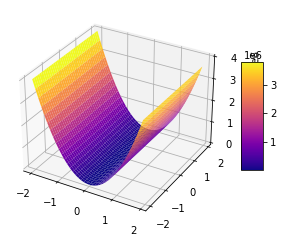

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def bent_cigar_function(x, y):
    return x**2 + 1e6 * y**2

# Define the ranges for the x and y axes
x_min, x_max = -2, 2
y_min, y_max = -2, 2

# Create a meshgrid of points within the specified ranges
X, Y = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Calculate the values of the function at each point in the meshgrid
Z = np.vectorize(bent_cigar_function)(X, Y)

# Create a 3D plot of the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Y, X, Z, cmap='plasma')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


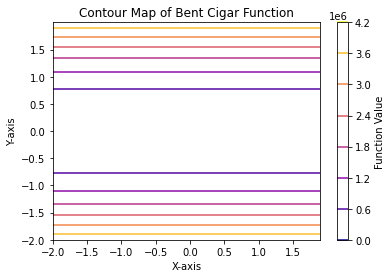

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def bent_cigar_function(x, y):
    return x**2 + 1e6 * y**2

# Define the ranges for the x and y axes
x_min, x_max = -2, 2
y_min, y_max = -2, 2

# Create a meshgrid of points within the specified ranges
X, Y = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, .000001))

# Calculate the values of the function at each point in the meshgrid
Z = np.vectorize(bent_cigar_function)(X, Y)

# Create a contour plot of the function
plt.contour(X, Y, Z, cmap='plasma')

# Label the axes and show the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Contour Map of Bent Cigar Function')
plt.colorbar(label='Function Value')
plt.show()


In [75]:
import ctypes

# Load the shared library
lib = ctypes.CDLL('CEC2020')  # Change the library name and path accordingly


FileNotFoundError: Could not find module 'CEC2020' (or one of its dependencies). Try using the full path with constructor syntax.

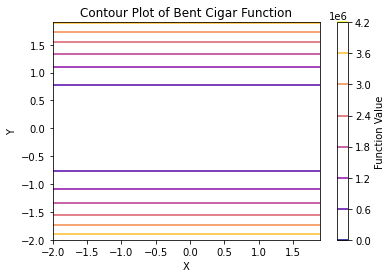

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def bent_cigar_function(x, y):
    return x**2 + 1e6 * y**2

# Define the ranges for the x and y axes
x_min, x_max = -2, 2
y_min, y_max = -2, 2

# Create a meshgrid of points within the specified ranges
X, Y = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Calculate the values of the function at each point in the meshgrid
Z = np.vectorize(bent_cigar_function)(X, Y)

# Create a contour plot of the function
plt.contour(X, Y, Z, cmap='plasma')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of Bent Cigar Function')
plt.colorbar(label='Function Value')
plt.show()


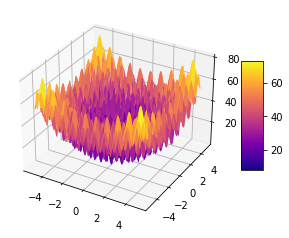

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rastrigin_function(x, y, A=10):
    return 2*A + x**2 - A*np.cos(2*np.pi*x) + y**2 - A*np.cos(2*np.pi*y)

# Define the ranges for the x and y axes
x_min, x_max = -5.12, 5.12
y_min, y_max = -5.12, 5.12

# Create a meshgrid of points within the specified ranges
X, Y = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Calculate the values of the function at each point in the meshgrid
Z = np.vectorize(rastrigin_function)(X, Y)

# Create a 3D plot of the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='plasma')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


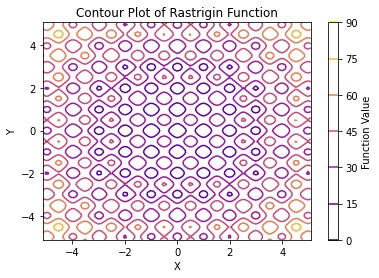

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def rastrigin_function(x, y, A=10):
    return 2*A + x**2 - A*np.cos(2*np.pi*x) + y**2 - A*np.cos(2*np.pi*y)

# Define the ranges for the x and y axes
x_min, x_max = -5.12, 5.12
y_min, y_max = -5.12, 5.12

# Create a meshgrid of points within the specified ranges
X, Y = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Calculate the values of the function at each point in the meshgrid
Z = np.vectorize(rastrigin_function)(X, Y)

# Create a contour plot of the function
plt.contour(X, Y, Z, cmap='plasma')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of Rastrigin Function')
plt.colorbar(label='Function Value')
plt.show()


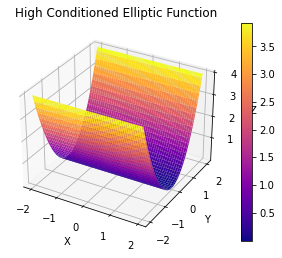

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



def high_conditioned_elliptic_function(x):
    a = 1e6
    d = len(x)
    return np.sum([a**((i-1)/(d-1))*(x[i]**2) for i in range(d)])



# Define the ranges for the x, y, and z axes
x_range = y_range = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)

# Evaluate the function at each point in the meshgrid
for i in range(len(x_range)):
    for j in range(len(y_range)):
        point = [X[i, j], Y[i, j]]
        Z[i, j] = high_conditioned_elliptic_function(point)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='none')
fig.colorbar(surf)

# Set the axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('High Conditioned Elliptic Function')

plt.show()

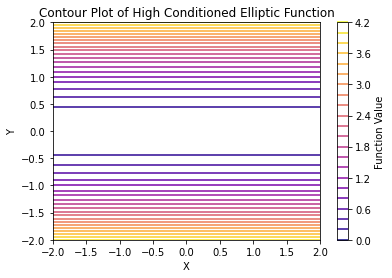

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def high_conditioned_elliptic_function(x):
    a = 1e6
    d = len(x)
    return np.sum([a**((i-1)/(d-1))*(x[i]**2) for i in range(d)])

# Define the ranges for the x, y, and z axes
x_range = y_range = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)

# Evaluate the function at each point in the meshgrid
for i in range(len(x_range)):
    for j in range(len(y_range)):
        point = [X[i, j], Y[i, j]]
        Z[i, j] = high_conditioned_elliptic_function(point)

# Create a contour plot of the function
plt.contour(X, Y, Z, cmap='plasma', levels=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of High Conditioned Elliptic Function')
plt.colorbar(label='Function Value')
plt.show()


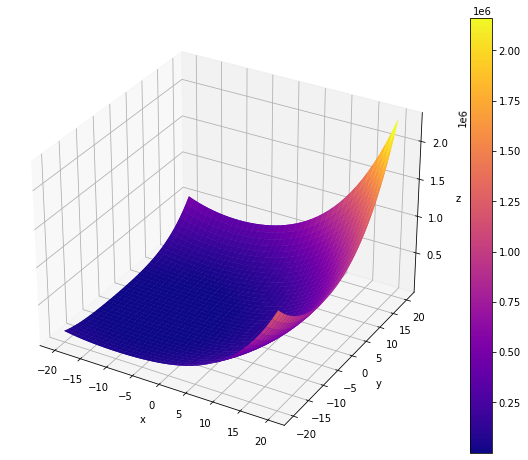

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def hgbat_function(x):
    a = [-10, -5]
    term1 = np.sum((x - a) ** 2) ** 2
    term2 = np.sum(x - a) ** 2 / 1e6
    return term1 + term2

# Define the ranges for the x and y axes
x_range = np.linspace(-20, 20, 40)
y_range = np.linspace(-20, 20, 40)

# Create a meshgrid of the x and y ranges
X, Y = np.meshgrid(x_range, y_range)

# Calculate the values of the function at each point in the meshgrid
Z = np.zeros((len(x_range), len(y_range)))
for i in range(len(x_range)):
    for j in range(len(y_range)):
        Z[i][j] = hgbat_function(np.array([X[i][j], Y[i][j]]))

# Create a 3D plot of the function with a colorbar
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')
cbar = plt.colorbar(ax.plot_surface(X, Y, Z, cmap='plasma'))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

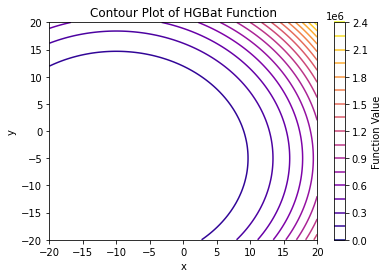

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def hgbat_function(x):
    a = [-10, -5]
    term1 = np.sum((x - a) ** 2) ** 2
    term2 = np.sum(x - a) ** 2 / 1e6
    return term1 + term2

# Define the ranges for the x and y axes
x_range = np.linspace(-20, 20, 100)
y_range = np.linspace(-20, 20, 100)

# Create a meshgrid of the x and y ranges
X, Y = np.meshgrid(x_range, y_range)

# Calculate the values of the function at each point in the meshgrid
Z = np.zeros_like(X)
for i in range(len(x_range)):
    for j in range(len(y_range)):
        Z[i, j] = hgbat_function(np.array([X[i, j], Y[i, j]]))

# Create a contour plot of the function
plt.contour(X, Y, Z, cmap='plasma', levels=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of HGBat Function')
plt.colorbar(label='Function Value')
plt.show()


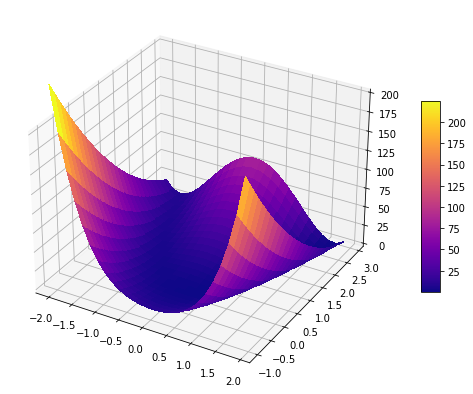

In [6]:
# Source: https://people.bath.ac.uk/ps2106/files/courses/MA40050/2020/jupyter/Rosenbrock.html
b = 10;
f = lambda x,y: (x-1)**2 + b*(y-x**2)**2;

# def rosenbrock_function(x, y):
#     return np.sum(100 * (y - x**2)**2 + (1 - x)**2)

# Initialize figure 
figRos = plt.figure(figsize=(12, 7))
axRos = figRos.gca(projection='3d')

# Evaluate function
X = np.arange(-2, 2, 0.15)
Y = np.arange(-1, 3, 0.15)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Plot the surface
surf = axRos.plot_surface(X, Y, Z, cmap='plasma',
                       linewidth=0, antialiased=False)
axRos.set_zlim(0, 200)
figRos.colorbar(surf, shrink=0.5, aspect=10)
plt.show()


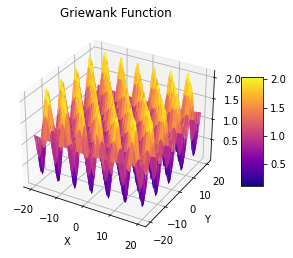

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

def griewank_function(x1, x2):
    return (x1 ** 2 + x2 ** 2)/4000.0 - math.cos(x1) * math.cos(x2 / math.sqrt(2)) + 1.0

# Set up a meshgrid to plot the function over
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)

# Calculate the values of the function at each point in the meshgrid
Z = np.zeros((100,100))
for ii in range(100):
    for jj in range(100):
        Z[ii,jj] = griewank_function(X[ii,jj], Y[ii,jj])

# Create a 3D plot of the function with a colorbar
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='plasma')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Griewank Function')
plt.show()


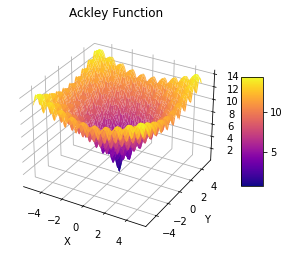

In [8]:
def ackley_function(x, y):
    term1 = -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2)))
    term2 = -np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)))
    term3 = np.exp(1) + 20.0
    return term1 + term2 + term3

# Define the range of the plot
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate the values of the function at each point in the meshgrid
Z = ackley_function(X, Y)

# Create a 3D plot of the function with a colorbar
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='plasma')
fig.colorbar(surf, shrink=0.5, aspect=5)

# Set the axis color to match the background color
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Set the background color
ax.set_facecolor((1.0, 1.0, 1.0, 0.0))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Ackley Function')

ax.grid(True)

plt.show()

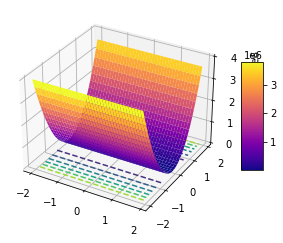

In [9]:
def contour_plot_1(function, domain=(-100,100), points=30, ax=None, dimension=2):
    # create points^2 tuples of (x,y) and populate z
    xys = np.linspace(domain[0], domain[1], points)
    xys = np.transpose([np.tile(xys, len(xys)), np.repeat(xys, len(xys))])

    if dimension > 2:
        # concatenate remaining zeros
        tail = np.zeros((xys.shape[0], dimension - 2))
        x = np.concatenate([xys, tail], axis=1)
        zs = function(x)
    else:
        zs = function(xys)

    fig = plt.figure()
    ax = fig.gca()

    X = xys[:,0].reshape((points, points))
    Y = xys[:,1].reshape((points, points))
    Z = zs.reshape((points, points))
    cont = ax.contourf(X, Y, Z, lw = 1, levels=20, cmap='plasma')
    ax.contour(X, Y, Z, colors="k", linestyles="solid")
    cbar = fig.colorbar(cont, shrink=0.5, aspect=5, pad=0.15, label='')
#     cbar = fig.colorbar(ax.collections[0], shrink=0.5, aspect=5, pad=0.15, label='')

    ax.set_title(function.__name__)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # Set the background color
    ax.set_facecolor((1.0, 1.0, 1.0, 0.0))
    plt.show()
    
    return fig

In [12]:
contour_plot_1(1)


TypeError: 'int' object is not callable